# Overview
In this project, we analyzed productivity and downtime data for a soda bottling production line, which includes information on the operator, product, start and end times, and the factors contributing to downtime for each batch.

We will assist them in answering questions such as:
- What is the current line efficiency? (Min Time / Actual Time) * 100
- Are any operators underperforming?
- What are the main factors causing downtime?
- Do any operators face challenges with specific types of operator error?

# Data Gathering

We downloaded the dataset from [Maven Analytics](https://mavenanalytics.io/data-playground?dataStructure=Multiple%20tables&order=date_added%2Cdesc&tags=Business&tags=Environment&tags=Finance&tags=Food%20%26%20Beverage&tags=Government&tags=Healthcare&tags=Human%20Resources&tags=Retail&tags=Survey&tags=Time%20Series&tags=Transportation), titled `Manufacturing Downtime`. It contains four tables.

Here is a description for each column:


| Table             | Field             | Description                                                             |
|------------------|-------------------|-------------------------------------------------------------------------|
| Line productivity | Date              | Date the batch was produced                                             |
| Line productivity | Product           | ID for the product produced in the batch                                |
| Line productivity | Batch             | Unique ID for the batch produced                                        |
| Line productivity | Operator          | Production line operator in charge of the batch                         |
| Line productivity | Start Time        | Time the batch production started                                       |
| Line productivity | End Time          | Time the batch production ended                                         |
| Products          | Flavor            | Soda flavor for the product                                             |
| Products          | Size              | Product size (volume)                                                   |
| Products          | Min batch time    | Minimum time required to produce a batch (with no downtime)            |
| Line downtime     | Downtime factor | Downtime minutes for each factor ID (each factor is a column)          |
| Downtime factors  | Factor            | Unique ID for each downtime factor                                      |
| Downtime factors  | Description       | Downtime factor description                                             |
| Downtime factors  | Operator Error    | Indicates if the downtime was due to operator error (Yes/No)           |


# Exploratory Data Analysis

### Data Assessment and Cleaning
- There are no missing values.
- There are no duplicate rows.
- Downtime factors table
    - Twelve factors may lead to downtime. Half of them are due to operator errors.
- Line downtime table
    - This table is untidy. Each column does not represent a variable. It is pivoted. We need to unpivot it.
    - Use the first row as headers. Then select the `Batch` column and choose **Unpivot Other Columns** from the **Transform** menu.
    - You will get 3 columns:
        - `Batch`: Unique ID for the batch produced
        - `Factor`: Unique ID for each downtime factor
        - `Downtime`:  Downtime minutes for each factor ID
- Line productivity table
    -  Modify the data types of the `Start Time` and `End Time` columns to the **Time** data type.
    -  Create a new column to represent the batch's actual time in minutes by subtracting the start time from the end time.
    -  Use this formula to handle periods that cross midnight:
      
```
      Number.Round((if([Start Time] > [End Time]) then [End Time] - [Start Time] + 1 else [End Time] - [Start Time]) * 1440, 0)
```

- Calculated the line efficiency:
$ \text{Line Efficiency} = (\text{Min Time} / \text{Total Batch Duration}) * 100 $

#### Data Model
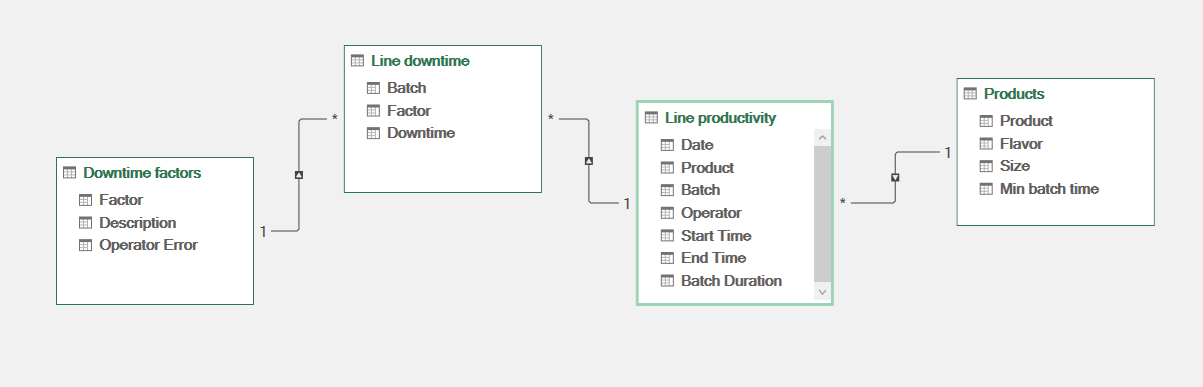